In [53]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


from tqdm import tqdm
from spellchecker import SpellChecker

In [44]:
from PIL import Image

import cv2

In [45]:
image = Image.open('./images/img6.png')
image = cv2.imread('./images/img6.png')
image = image[..., ::-1]

In [184]:
ocr_agent = lp.TesseractAgent(languages='por')

res = ocr_agent.detect(image, return_response=True)
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.LINE)

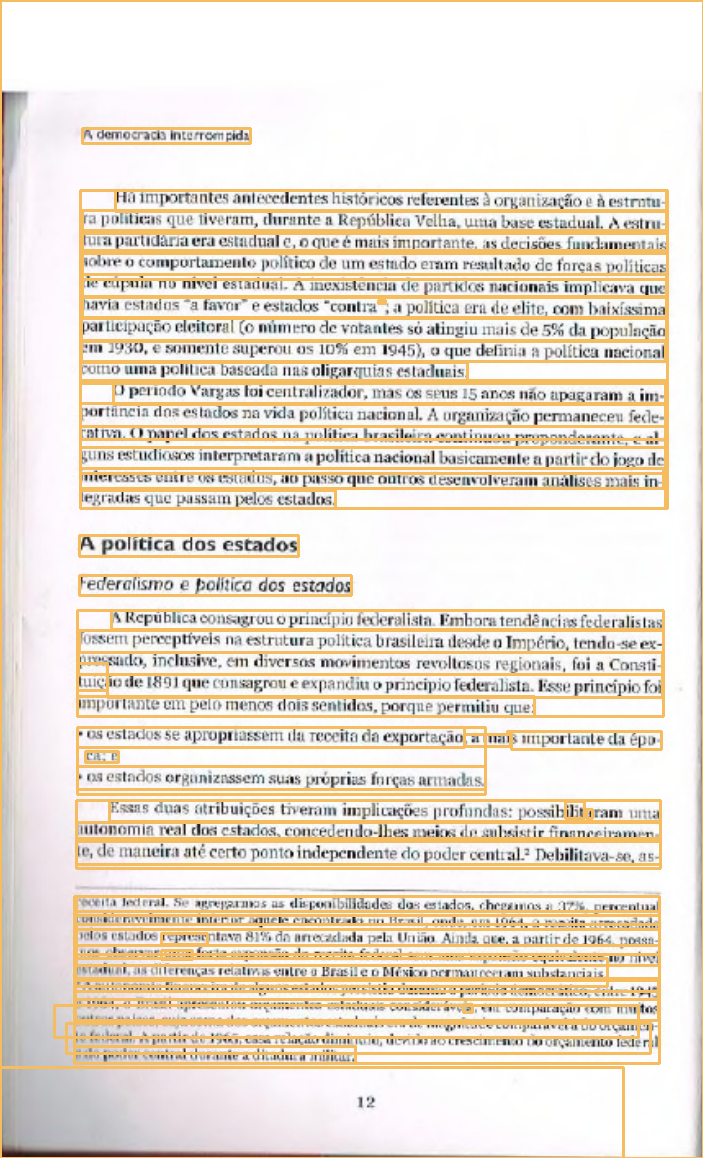

In [185]:
lp.draw_box(image, layout)

In [186]:
dl = layout.to_dataframe()

In [200]:
dl

,x_1,y_1,x_2,y_2,block_type,text,id,score
0,0,0,703,1158,rectangle,,0,-1.0
1,82,128,250,143,rectangle,,1,-1.0
2,82,128,250,143,rectangle,,2,-1.0
3,82,128,250,143,rectangle,A democracia inturroen pida,3,31.4
4,80,190,667,508,rectangle,,4,-1.0
...,...,...,...,...,...,...,...,...
86,463,1004,472,1012,rectangle,,86,-1.0
87,463,1004,472,1012,rectangle,,87,47.0
88,0,1067,623,1158,rectangle,,88,-1.0
89,0,1067,623,1158,rectangle,,89,-1.0


In [237]:
import re
dl['c_text'] = dl.text.apply(lambda x: x.strip())
text = '\n'.join(dl.c_text)
text = re.sub('\n\n+','\n\n',text).strip()

In [ ]:
from os import listdir

In [255]:
def extract_text(image):
    ocr_agent = lp.TesseractAgent(languages='por')

    res = ocr_agent.detect(image, return_response=True)
    layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.LINE)
    
    dl = layout.to_dataframe()
    dl['c_text'] = dl.text.apply(lambda x: x.strip())
    text = '\n'.join(dl.c_text)
    text = re.sub('\n\n+','\n\n',text).strip()
    return text


In [272]:
imagespath = ['./images/' + i for i in listdir('./images/')]
pages = []
error_page = []
for path in tqdm(imagespath):
    try:
        image = cv2.imread(path)
        image = image[..., ::-1]
        pages.append(extract_text(image))
    except:
        error_page.append(path)

100%|█████████████████████████████████████████| 371/371 [38:15<00:00,  6.19s/it]
